## Index
* Imports and some function helpers
* Data Loading
* EDA
  * General and by column view
  * Feature engineering
* Data Preparation
  * Missing Value Imputation
  * Encoding labels
  * Infering missing values
  * Scaling values
  * Feature selection
* Predicting
  * Data Splitting
  * Model training
  * Ensemble Prediction
  * Cross Validating

## References
### Theory
* [Ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning)
* [Bagging, boosting and stacking in machine learning](https://stats.stackexchange.com/questions/18891/bagging-boosting-and-stacking-in-machine-learning)
* [How to Implement Stacked Generalization From Scratch With Python](https://machinelearningmastery.com/implementing-stacking-scratch-python/)

### Thanks to
1. [https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline](https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline)
2. [https://www.kaggle.com/shivendra91/rolling-in-the-deep](https://www.kaggle.com/shivendra91/rolling-in-the-deep)
3. [https://www.kaggle.com/samratp/beginner-tutorial-using-votingclassifier-82-27](https://www.kaggle.com/samratp/beginner-tutorial-using-votingclassifier-82-27)
4. [https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish](https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish)
5. [https://www.kaggle.com/omarelgabry/a-journey-through-titanic](https://www.kaggle.com/omarelgabry/a-journey-through-titanic)
6. [https://www.kaggle.com/pliptor/divide-and-conquer-0-82297](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297)
7. [https://www.kaggle.com/sinakhorami/titanic-best-working-classifier](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier)
8. [https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)
9. [https://www.kaggle.com/liyenhsu/titanic-neural-network](https://www.kaggle.com/liyenhsu/titanic-neural-network)
10. [https://www.kaggle.com/scirpus/genetic-programming-lb-0-88](https://www.kaggle.com/scirpus/genetic-programming-lb-0-88)
11. [http://www.ultravioletanalytics.com/2014/10/30/kaggle-titanic-competition-part-i-intro/](http://www.ultravioletanalytics.com/2014/10/30/kaggle-titanic-competition-part-i-intro/)

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn import tree
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.cross_validation import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier


# Configuraciones
matplotlib.style.use('ggplot')
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

survivedColors = ['r','g']
figsize = (12,6)

def showGeneralGraph(data,col,vrs) :  
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches((12,4), forward=True)

    plt.subplot(1,3,1)
    d = [data[col].notnull().sum(), data[col].isnull().sum()]
    plt.pie(d, labels=['','NULL'], autopct='%1.1f%%', shadow=True, startangle=0)
    
    plt.subplot(1,3,2)
    d = data[col].value_counts().sort_index();
    plt.pie(d, labels=d.index.tolist(), autopct='%1.1f%%', shadow=True, startangle=0)

    ax = plt.subplot(1,3,3)
    ct = pd.crosstab(data[col], data[vrs])
    r = ct.plot.bar(color=survivedColors, stacked=True, ax=ax)
    autolabel(r)
    plt.legend(('Dead', 'Survived'),loc='best') ;

    plt.show()
    
def autolabel(r):
    """
    Attach a text label above each bar displaying its percentage
    """
    lines, labels = r.get_legend_handles_labels()
    k = len(labels)
    n = int(len(r.patches) / k)
    for x in range(0, n) :
        tot = 0
        for y in range(0, k) :
            tot += r.patches[x + (n * y)].get_height()
        if tot == 0 :
            continue
        for y in range(0, k) :
            rect = r.patches[x + (n * y)]
            height = rect.get_height()
            per = round((height / tot) * 100, 2)
            r.text(rect.get_x() + rect.get_width() / 2., rect.get_y() + height / 2., per, ha='center', va='bottom')    

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data Loading

In [2]:
train_url = "../input/train.csv"
train = pd.read_csv(train_url)

test_url = "../input/test.csv"
test = pd.read_csv(test_url)

In [3]:
train.shape

(891, 12)

In [4]:
eda = train
eda = eda.drop('PassengerId', 1)

## EDA

In [5]:
eda.head(7).T

,0,1,2,3,4,5,6
Survived,0,1,1,1,0,0,0
Pclass,3,1,3,1,3,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J"
Sex,male,female,female,female,male,male,male
Age,22,38,26,35,35,NaN,54
SibSp,1,1,0,1,0,0,0
Parch,0,0,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625
Cabin,NaN,C85,NaN,C123,NaN,NaN,E46


Categorical Columns

Sex           0
Embarked      2
Name          0
Ticket        0
Cabin       687
Fare          0
dtype: int64


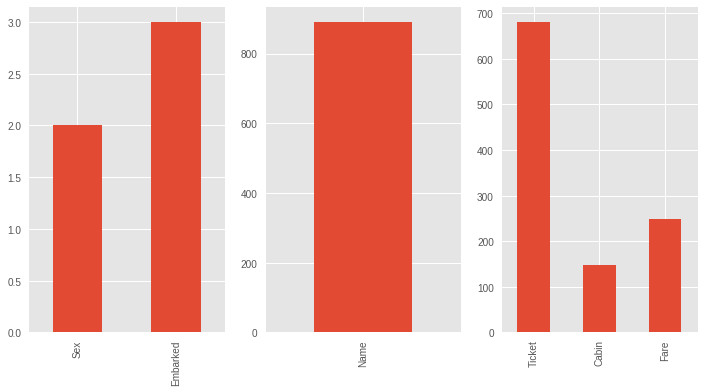

In [6]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(figsize, forward=True)

print(eda[['Sex','Embarked','Name','Ticket','Cabin', 'Fare']].isnull().sum())

# Categorical Columns
# Small
plt.subplot(1,3,1)
cat_columns = ['Sex', 'Embarked']
cols = eda[cat_columns].apply(pd.Series.nunique)
cols.plot(kind='bar')
# Id
plt.subplot(1,3,2)
cat_columns = ['Name']
cols = eda[cat_columns].apply(pd.Series.nunique)
cols.plot(kind='bar')

# Unknown
plt.subplot(1,3,3)
cat_columns = ['Ticket','Cabin', 'Fare']
cols = eda[cat_columns].apply(pd.Series.nunique)
cols.plot(kind='bar')

In [7]:
eda.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Sex

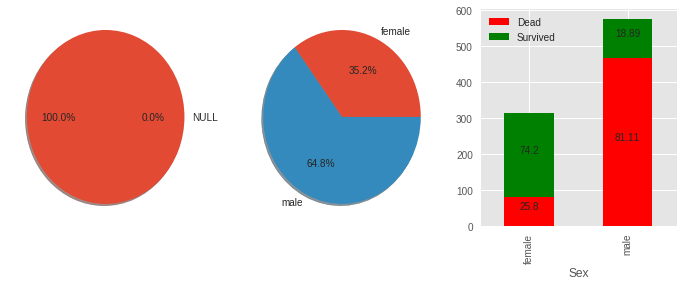

In [8]:
showGeneralGraph(eda, 'Sex', 'Survived')

### Age

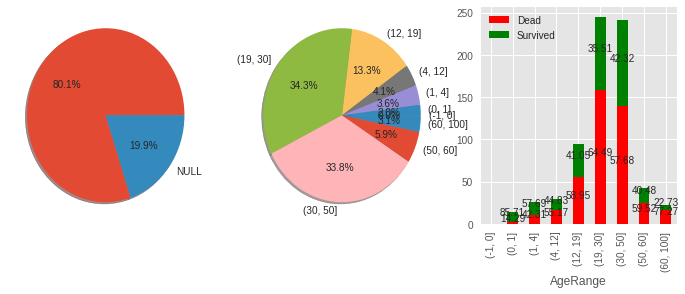

In [9]:
def featAgeRange(data) :
    bins = np.array([-1,0,1,4,12,19,30,50,60,100])
    data['AgeRange'] = pd.cut(data.Age, bins)

featAgeRange(eda)
showGeneralGraph(eda, 'AgeRange', 'Survived')

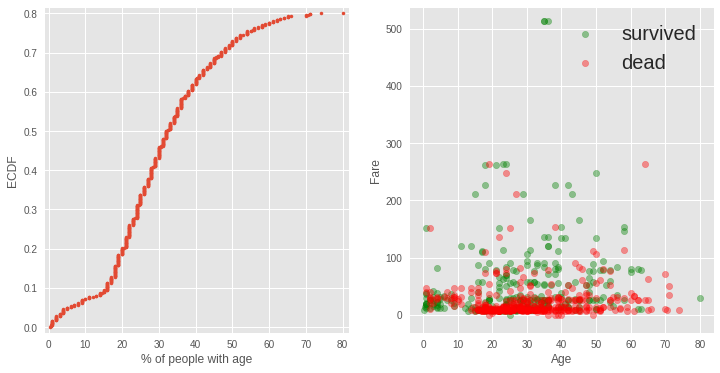

In [10]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(figsize, forward=True)

plt.subplot(1,2,1)
x = np.sort(eda.Age)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("% of people with age")
plt.ylabel("ECDF")
plt.margins(0.02)

plt.subplot(1,2,2)
plt.scatter(eda[eda['Survived']==1]['Age'],eda[eda['Survived']==1]['Fare'],c='green',s=40, alpha=0.4)
plt.scatter(eda[eda['Survived']==0]['Age'],eda[eda['Survived']==0]['Fare'],c='red',s=40,  alpha=0.4)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=20,)

plt.show()

### Name

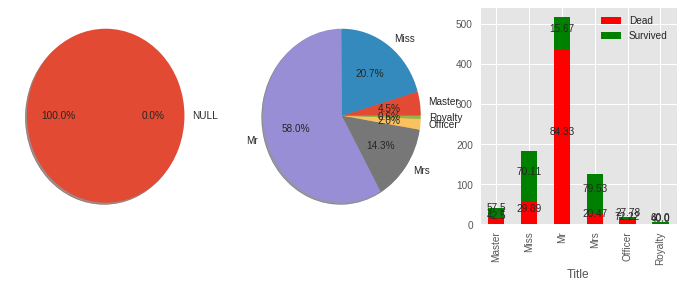

In [11]:
def featTitle(data) :
    data['Title'] = data.SibSp + data.Parch

    data['Title'] = data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    Title_Dictionary = {
                "Capt":       "Officer",
                "Col":        "Officer",
                "Major":      "Officer",
                "Jonkheer":   "Royalty",
                "Don":        "Royalty",
                "Sir" :       "Royalty",
                "Dr":         "Officer",
                "Rev":        "Officer",
                "the Countess":"Royalty",
                "Dona":       "Royalty",
                "Mme":        "Mrs",
                "Mlle":       "Miss",
                "Ms":         "Mrs",
                "Mr" :        "Mr",
                "Mrs" :       "Mrs",
                "Miss" :      "Miss",
                "Master" :    "Master",
                "Lady" :      "Royalty"
    }

    data.Title = data.Title.map(Title_Dictionary)

featTitle(eda)
showGeneralGraph(eda, 'Title', 'Survived')

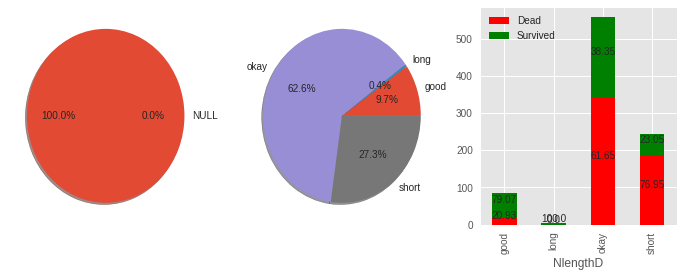

In [12]:
def featNameLength(data) :
    data["NameLength"] = data["Name"].apply(lambda x: len(x))
    bins = [0, 20, 40, 57, 85]
    group_names = ['short', 'okay', 'good', 'long']
    data['NlengthD'] = pd.cut(data['NameLength'], bins, labels=group_names)

featNameLength(eda)
showGeneralGraph(eda, 'NlengthD', 'Survived')

### Family

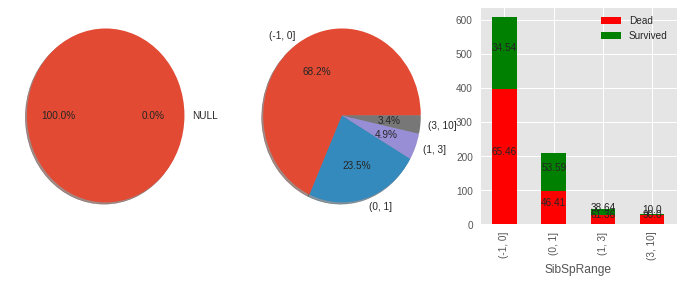

In [13]:
def featSibSpRange(data) :
    bins = np.array([-1,0,1,3,10])
    data['SibSpRange'] = pd.cut(data.SibSp, bins)

featSibSpRange(eda)
showGeneralGraph(eda, 'SibSpRange', 'Survived')

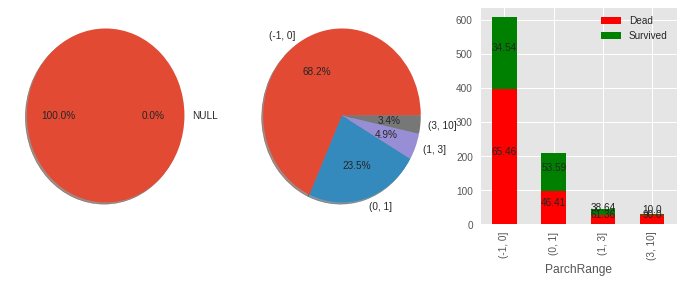

In [14]:
def featParchRange(data) :
    bins = np.array([-1,0,1,3,10])
    data['ParchRange'] = pd.cut(data.SibSp, bins)

featParchRange(eda)
showGeneralGraph(eda, 'ParchRange', 'Survived')

In [15]:
# Same Ticket?
def featTicketCount(data) :
    j = data.groupby(["Ticket"]).size().reset_index(name='TicketCount')
    return data.join(j.set_index('Ticket'), on='Ticket')

eda = featTicketCount(eda)

### Is Alone?

In [16]:
def featIsWithFamily(data) :
    data['IsWithFamily'] = 1
    data.loc[(data.Parch == 0) & (data.SibSp == 0), ['IsWithFamily']] = 0

featIsWithFamily(eda)

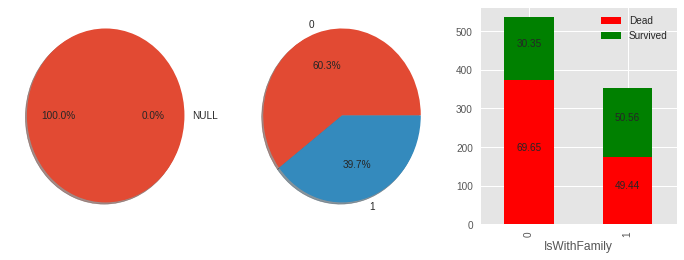

In [17]:
showGeneralGraph(eda, 'IsWithFamily', 'Survived')

In [18]:
def featIsAlone(data) :
    data['IsAlone'] = 0
    data.loc[(data.TicketCount == 1) & (data.IsWithFamily == 0), ['IsAlone']] = 1

featIsAlone(eda)

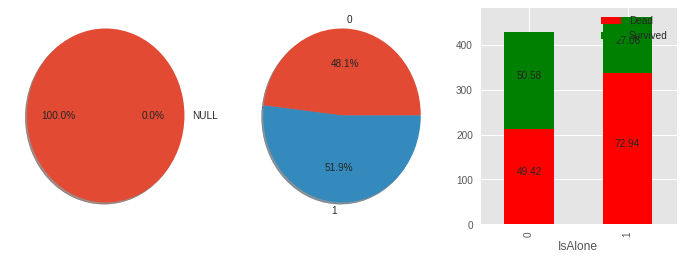

In [19]:
showGeneralGraph(eda, 'IsAlone', 'Survived')

In [20]:
def featGroup(data) :   
    # Group
    data['FamilySize'] = data.SibSp + data.Parch + 1
    data.loc[data["FamilySize"] == 1, "FsizeD"] = 'singleton'
    data.loc[(data["FamilySize"] > 1)  &  (data["FamilySize"] < 5) , "FsizeD"] = 'small'
    data.loc[data["FamilySize"] >4, "FsizeD"] = 'large'
    
featGroup(eda)

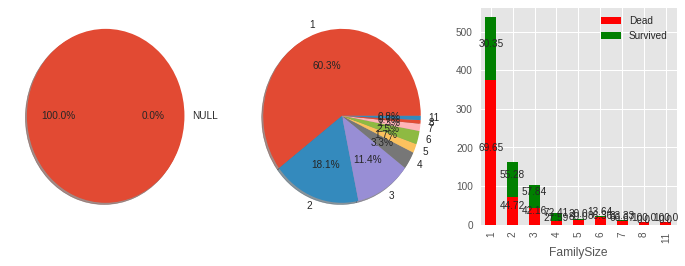

In [21]:
showGeneralGraph(eda, 'FamilySize', 'Survived')

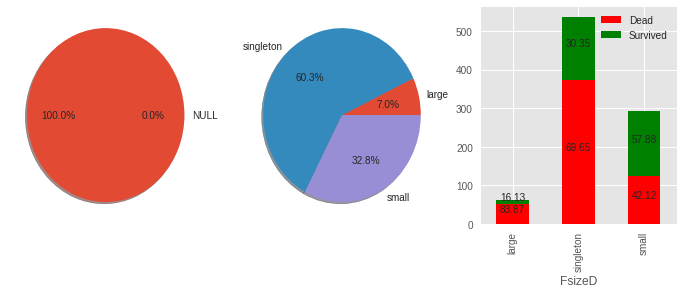

In [22]:
showGeneralGraph(eda, 'FsizeD', 'Survived')

### IsFather

In [23]:
def featIsFather(data) : 
    data['IsFather'] = 0
    data.loc[(data.Name.str.contains('Mr.')) & (data.Parch > 0) & (data.Sex == 'male'), ['IsFather']] = 1

featIsFather(eda)

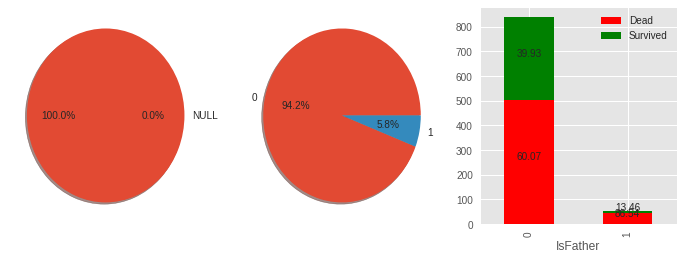

In [24]:
showGeneralGraph(eda, 'IsFather', 'Survived')

In [25]:
### Is Mother

In [26]:
def featIsMother(data) :
    data['IsMother'] = 0
    data.loc[(data.Name.str.contains('Mrs.')) & (data.Parch > 0) & (data.Sex == 'female'), ['IsMother']] = 1
    
featIsMother(eda)

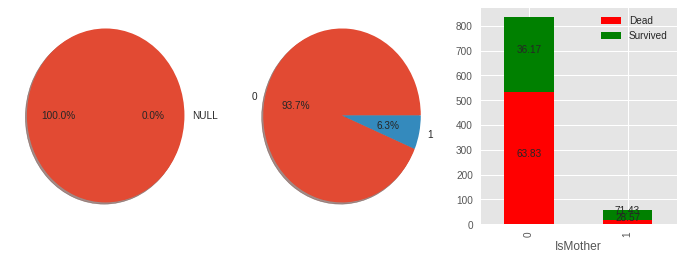

In [27]:
showGeneralGraph(eda, 'IsMother', 'Survived')

#### Factor Econ&oacute;mico
##### Clase

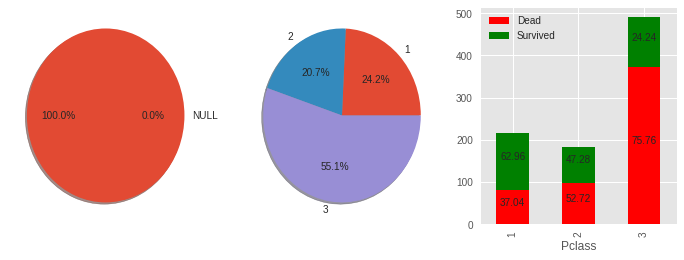

In [28]:
showGeneralGraph(eda, 'Pclass', 'Survived')

##### Fare

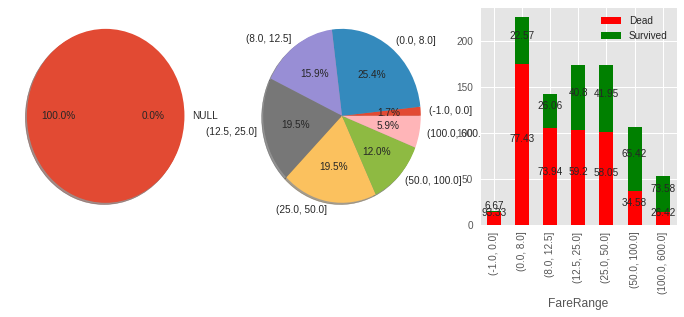

In [29]:
def featFareRange(data):
    bins = np.array([-1,0,8,12.5,25,50,100,600])
    data['FareRange'] = pd.cut(data.Fare, bins)

featFareRange(eda)
showGeneralGraph(eda, 'FareRange', 'Survived')

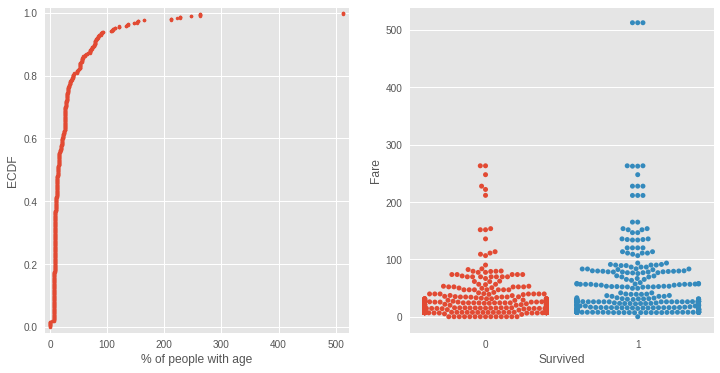

In [30]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(figsize, forward=True)

plt.subplot(1,2,1)
x = np.sort(eda.Fare)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("% of people with age")
plt.ylabel("ECDF")
plt.margins(0.02)

plt.subplot(1,2,2)
_ = sns.swarmplot(x='Survived', y='Fare', data=eda)
# Label the axes
plt.xlabel('Survived')
plt.ylabel('Fare')

plt.show()

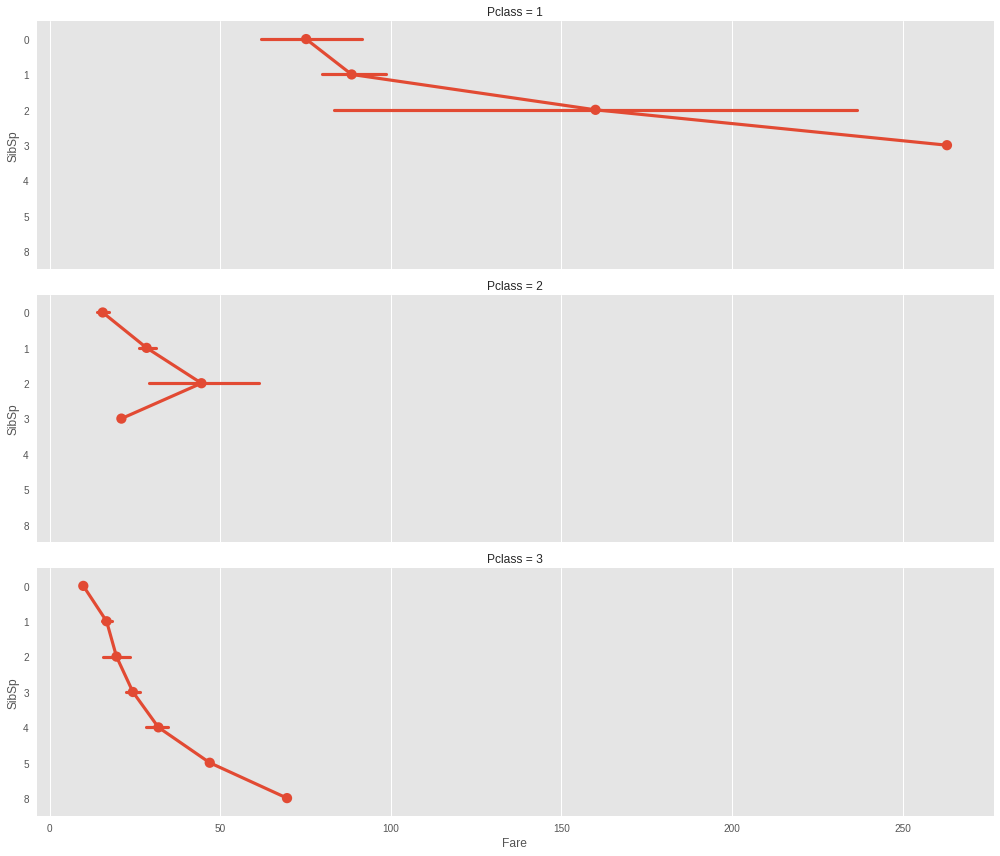

In [31]:
# Relation with SibSp and Parch
g = sns.factorplot(x="Fare", y="SibSp",
                    row="Pclass",
                    data=eda[eda.Embarked.notnull()],
                    orient="h",  aspect=3.5,                  
                    split=True, cut=0, bw=.2);

In [32]:
def featFarePerTicket(data):
    data['FarePerTicket'] = data.Fare / data.TicketCount

featFarePerTicket(eda)

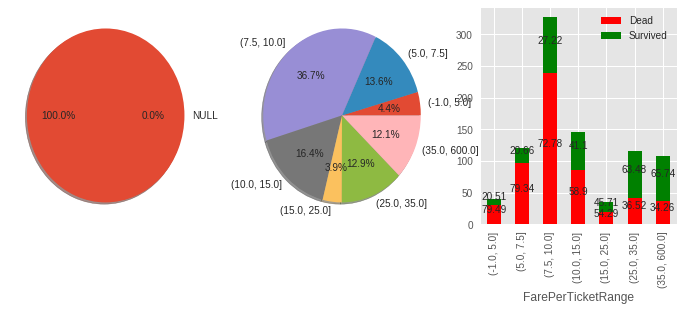

In [33]:
def featFarePerTicketRange(data):
    bins = np.array([-1,5,7.5,10,15,25,35,600])
    data['FarePerTicketRange'] = pd.cut(data.FarePerTicket, bins)

featFarePerTicketRange(eda)
showGeneralGraph(eda, 'FarePerTicketRange', 'Survived')

#### Embarked

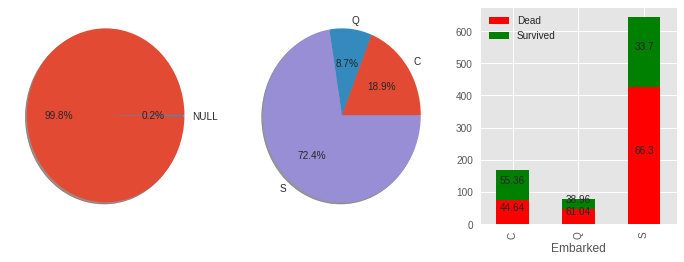

In [34]:
showGeneralGraph(eda, 'Embarked', 'Survived')

### Cabin

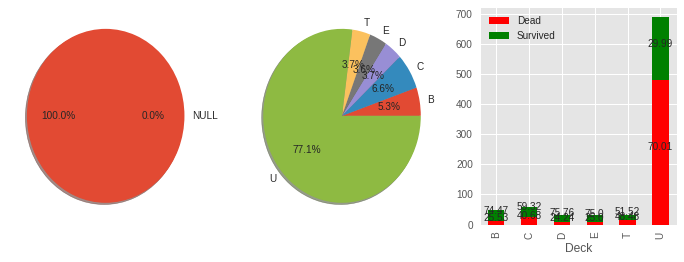

In [35]:
def featDeck(data) :
    def cleanCabin(ticket):
        if(type(ticket) == str):          
            if (len(ticket)) > 0:
                return ticket[0]
        else: 
            return 'U'

    data['Deck'] = data.Cabin.map(cleanCabin)

    Deck_Dictionary = {
        'U':'U',
        'A':'T',
        'B':'B',
        'C':'C',
        'D':'D',
        'E':'E',
        'F':'T',
        'G':'T',
        'T':'T'
    }
    data.Deck = data.Deck.map(Deck_Dictionary)

featDeck(eda)
showGeneralGraph(eda, 'Deck', 'Survived')

## Data Preparation

In [36]:
pd.DataFrame(eda.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange,Title,NameLength,NlengthD,SibSpRange,ParchRange,TicketCount,IsWithFamily,IsAlone,FamilySize,FsizeD,IsFather,IsMother,FareRange,FarePerTicket,FarePerTicketRange,Deck


### Missing Values

In [37]:
def getColumnsToReview(data) :
    cols = pd.DataFrame(data.isnull().sum())
    return cols.loc[cols[0] > 0, :]

getColumnsToReview(eda)

,0
Age,177
Cabin,687
Embarked,2
AgeRange,177


In [38]:
def imputeMissingData(data) : 
    data["Fare"].fillna(data["Fare"].median(), inplace=True)
    featFarePerTicket(data)
    data["Cabin"].fillna('U', inplace=True)
    data["Embarked"].fillna('C', inplace=True)
    
imputeMissingData(eda)

### Encoding values

In [39]:
def convertData(data) :
    labelEnc = LabelEncoder()
    cat_vars = ['Embarked','Sex',"Title","FsizeD","NlengthD",'Deck','Ticket','Cabin']
    for col in cat_vars:
        data[col] = labelEnc.fit_transform(data[col])

convertData(eda)

### Infering missing values

In [40]:
def inferMissing(data):
    def fill_missing_age(df):
        #Feature set
        age_df = df[['Age','Embarked','Fare', 'Parch', 'SibSp',
                     'Title','Pclass','FamilySize',
                     'FsizeD','NameLength',"NlengthD",'Deck']]
        # Split sets into train and test
        tK  = age_df.loc[ (df.Age.notnull()) ]# known Age values
        tU = age_df.loc[ (df.Age.isnull()) ]# null Ages

        if len(tU) == 0 :
            return 0

        # All age values are stored in a target array
        y = tK.values[:, 0]

        # All the other values are stored in the feature array
        X = tK.values[:, 1::]

        # Create and fit a model
        rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
        rtr.fit(X, y)

        # Use the fitted model to predict the missing values
        predictedAges = rtr.predict(tU.values[:, 1::])

        # Assign those predictions to the full data set
        df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

        return len(tU)

    fill_missing_age(data)
    featAgeRange(data)

inferMissing(eda)

### Last Review

In [41]:
getColumnsToReview(eda)

,0


### Scaling

In [42]:
def featScaling(data) :
    data[['Age', 'Fare']] = preprocessing.normalize(data[['Age', 'Fare']])

featScaling(eda)

### Correlation

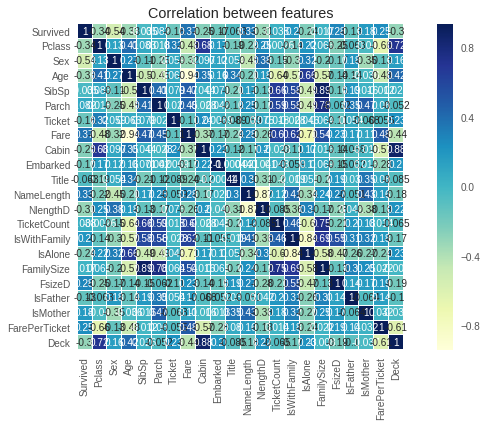

In [43]:
def getCorrelation(data) :
    corr=data.corr()
    plt.figure(figsize=figsize)

    sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="white")
    plt.title('Correlation between features');
    
getCorrelation(eda)

In [44]:
eda.corr()["Survived"]

Survived         1.000000
Pclass          -0.338481
Sex             -0.543351
Age             -0.330317
SibSp           -0.035322
Parch            0.081629
Ticket          -0.164549
Fare             0.367969
Cabin           -0.254888
Embarked        -0.174199
Title           -0.062916
NameLength       0.332350
NlengthD        -0.312234
TicketCount      0.038247
IsWithFamily     0.203367
IsAlone         -0.241717
FamilySize       0.016639
FsizeD           0.283810
IsFather        -0.127581
IsMother         0.175967
FarePerTicket    0.254824
Deck            -0.300717
Name: Survived, dtype: float64

### Setting Datasets

In [45]:
def settingDataset(data) : 
    data = featTicketCount(data)
    featIsMother(data)
    featIsFather(data)
    featFarePerTicket(data)
    featGroup(data)
    featIsWithFamily(data)
    featIsAlone(data)
    featTitle(data)
    featNameLength(data)
    featDeck(data)
    
    getColumnsToReview(data)
    imputeMissingData(data)
    convertData(data)
    inferMissing(data)
    data['AgeRange'] = LabelEncoder().fit_transform(data['AgeRange'])
    featScaling(data)    
    return data

In [46]:
train = settingDataset(train)
test = settingDataset(test)

### Feature Selection

In [47]:
cols = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TicketCount',
       'IsMother', 'IsFather', 'FarePerTicket', 'FamilySize', 'FsizeD',
       'IsWithFamily', 'IsAlone', 'Title', 'NameLength', 'NlengthD', 'Deck','AgeRange']

F = train[cols]
Fx = train.Survived

# feature extraction
model = ExtraTreesClassifier()
model.fit(F, Fx)
print(model.feature_importances_)
pd.DataFrame({'rank':model.feature_importances_, 'cols':cols}).sort_values(['rank'], ascending=[False])

[ 0.06200709  0.1738324   0.08622653  0.01122237  0.01726952  0.07657996
  0.0773441   0.02398947  0.03162758  0.03708352  0.00729457  0.00751091
  0.05867047  0.01187726  0.02560642  0.00696338  0.01532507  0.06619705
  0.06871156  0.04217624  0.04481265  0.04767188]


,cols,rank
1,Sex,0.173832
2,Age,0.086227
6,Fare,0.077344
5,Ticket,0.076580
18,NameLength,0.068712
17,Title,0.066197
0,Pclass,0.062007
12,FarePerTicket,0.058670
21,AgeRange,0.047672
20,Deck,0.044813


## Predicting

In [48]:
predictors = ['PassengerId','Sex','Age','Ticket','Fare','NameLength','Title','FarePerTicket','Pclass']
target = 'Survived'

### Data Splitting

In [49]:
X = train[predictors]
y = train[target]
TK = test[predictors]
TK = TK.drop('PassengerId', 1)
ids = test['PassengerId']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=23)

ids_train = X_train['PassengerId']
X_train = X_train.drop('PassengerId', 1)

ids_test = X_test['PassengerId']
X_test = X_test.drop('PassengerId', 1)

X = X.drop('PassengerId', 1)

### Model Training

In [50]:
forest = RandomForestClassifier(max_features='sqrt')

parameters = {'n_estimators':      [15, 20, 30],
              'max_features':      ['log2', 'sqrt','auto'], 
              'criterion':         ['entropy', 'gini'],
              'max_depth':         [11, 12, 14], 
              'min_samples_split': [7, 8, 9],
              'min_samples_leaf':  [2, 3, 4]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(forest,param_grid=parameters,scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Fit the best algorithm to the data. 
forest = grid_search.best_estimator_
forest.fit(X_train, y_train)

predictions = forest.predict(X_test)
print(accuracy_score(y_test, predictions))

Best score: 0.827247191011236
Best parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 20}
0.837988826816


In [51]:
lr = LogisticRegression(penalty='l2')

parameters = {
                 'tol' :     [0.00002, 0.00005, 0.00008],
                 'max_iter': [90, 100, 120],
            }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(lr,param_grid=parameters,scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Fit the best algorithm to the data. 
lr = grid_search.best_estimator_
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))

Best score: 0.7921348314606742
Best parameters: {'max_iter': 90, 'tol': 2e-05}
0.798882681564


In [52]:
adb = AdaBoostClassifier()

parameters = {
             'n_estimators': [100,140,155]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(adb,param_grid=parameters,scoring=acc_scorer)
grid_search = grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Fit the best algorithm to the data. 
adb = grid_search.best_estimator_
adb.fit(X_train, y_train)

predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))

Best score: 0.8103932584269663
Best parameters: {'n_estimators': 140}
0.798882681564


### Ensemble Prediction

In [53]:
eclf1 = VotingClassifier(estimators=[
        ('lr', lr), ('rf', forest), ('adb', adb)], voting='soft')

eclf1 = eclf1.fit(X_train, y_train)

pred = eclf1.predict(np.array(X_test))
print(accuracy_score(y_test, pred))

pred = eclf1.predict(np.array(TK))
pred = pd.DataFrame(np.array(pred).astype(int), ids, columns = ["Survived"])

0.821229050279


### Cross Validating

In [54]:
def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    
run_kfold(eclf1)

Fold 1 accuracy: 0.8
Fold 2 accuracy: 0.797752808988764
Fold 3 accuracy: 0.8314606741573034
Fold 4 accuracy: 0.8202247191011236
Fold 5 accuracy: 0.8314606741573034
Fold 6 accuracy: 0.8202247191011236
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.7528089887640449
Fold 9 accuracy: 0.8539325842696629
Fold 10 accuracy: 0.797752808988764
Mean Accuracy: 0.8069662921348314


* email:   jmarroyave@gmail.com
* twitter: @jmarroyave